# Tableau Homework - Citi Bike Analytics

Since 2013, the Citi Bike Program has implemented a robust infrastructure for collecting data on the program's utilization. Through the team's efforts, each month bike data is collected, organized, and made public on the Citi Bike Data [webpage](https://www.citibikenyc.com/system-data)

Task
Your task in this assignment is to aggregate the data found in the Citi Bike Trip History Logs and find two unexpected phenomena.

Design 2-5 visualizations for each discovered phenomena (4-10 total). You may work with a timespan of your choosing. Optionally, you may merge multiple datasets from different periods.

### Import Dependencies

In [1]:
import os
import pandas as pd

### Import and clean the data

In [2]:
directory = os.path.join("data","NY-2018-2020")

In [3]:
# Get list of files on the directory
files_list = [];
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        files_list.append(os.path.join(filename))

    else:
        continue

In [4]:
df_merged = pd.DataFrame({'A' : []})

In [5]:
n = 0
for file in files_list:
    if n == 0:
        filepath = os.path.join(directory,file)
        df_merged = pd.read_csv(filepath)
    else:
        filepath = os.path.join(directory,file)
        df = pd.read_csv(filepath)
        df_merged = pd.merge(df, df_merged, how='outer')
    
    n += 1

In [6]:
df_merged

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,521,2020-11-01 00:00:07.0150,2020-11-01 00:08:48.3010,3467,W Broadway & Spring St,40.724947,-74.001659,350,Clinton St & Grand St,40.715595,-73.987030,40405,Subscriber,1989,1
1,492,2020-11-01 00:00:10.8080,2020-11-01 00:08:23.3170,3557,40 Ave & 9 St,40.757420,-73.945133,3557,40 Ave & 9 St,40.757420,-73.945133,46504,Subscriber,1970,2
2,1979,2020-11-01 00:00:14.7040,2020-11-01 00:33:14.1640,3085,Roebling St & N 4 St,40.714690,-73.957390,3854,Morgan Ave & Maspeth Ave,40.716657,-73.936370,37452,Subscriber,1989,2
3,2382,2020-11-01 00:00:14.7070,2020-11-01 00:39:57.0030,3783,Cliff St & Fulton St,40.708380,-74.004950,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,40417,Subscriber,1981,1
4,166,2020-11-01 00:00:15.9690,2020-11-01 00:03:02.8980,422,W 59 St & 10 Ave,40.770513,-73.988038,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,35776,Subscriber,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6473793,1818,2020-09-30 23:59:48.8460,2020-10-01 00:30:07.7810,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,3836,Bushwick Ave & Linden St,40.691460,-73.921460,36220,Subscriber,1993,1
6473794,1553,2020-09-30 23:59:53.7240,2020-10-01 00:25:47.1760,390,Duffield St & Willoughby St,40.692216,-73.984284,3799,6 Ave & W 34 St,40.749640,-73.988050,31092,Subscriber,1995,1
6473795,626,2020-09-30 23:59:54.6670,2020-10-01 00:10:21.6050,3901,Stanhope St & Fairview Ave,40.709980,-73.911160,3083,Bushwick Ave & Powers St,40.712477,-73.941000,47224,Subscriber,1954,2
6473796,325,2020-09-30 23:59:56.2120,2020-10-01 00:05:21.3060,3148,E 84 St & 1 Ave,40.775655,-73.950686,3338,2 Ave & E 99 St,40.786259,-73.945526,16759,Subscriber,1995,2


In [7]:
df_merged.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [8]:
df_merged.isnull().values.any()

False

In [9]:
# creating bool series True for NaN values  
bool_series = pd.isnull(df_merged['starttime'])  
    
bool_series.describe()

count     6473798
unique          1
top         False
freq      6473798
Name: starttime, dtype: object

### Analytics

* How many trips have been recorded total during the chosen period?

In [10]:
# How many trips have been recorded total during the chosen period?
total_trips = df_merged['tripduration'].count()
print(f"How many trips have been recorded total during the chosen period? \nR:{total_trips}")

How many trips have been recorded total during the chosen period? 
R:6473798


<hr style="border-top: 3px solid gray;">

* By what percentage has total ridership grown?

In [11]:
df_merged.index = pd.to_datetime(df_merged['starttime'],format='%Y-%m-%d')
df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year])
# df_grouped_starttime = df_merged.groupby(by=[ df_merged.index.year, df_merged.index.month])

In [12]:
df_grouped_year = df_grouped_starttime.count()
df_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2020,6473798,6473798,6473798,6473798,6473798,6473798,6473798,6473798,6473798,6473798,6473798,6473798,6473798,6473798,6473798


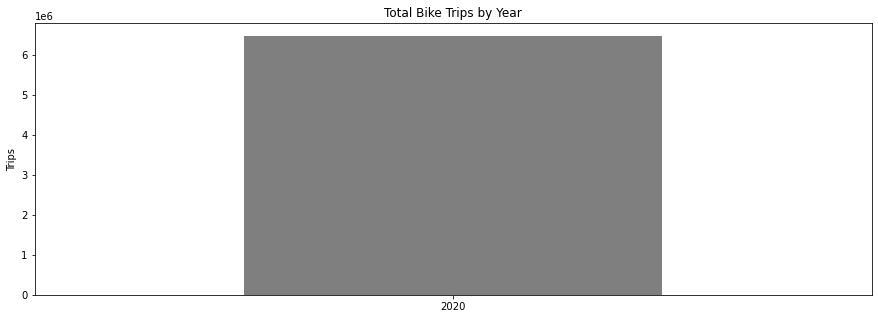

In [13]:
ax = df_grouped_year['tripduration'].plot(kind="bar",color="black", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Total Bike Trips by Year");

In [14]:
growth_2019 = df_grouped_year['tripduration'].iloc[1] / df_grouped_year['tripduration'].iloc[0]
growth_2020 = df_grouped_year['tripduration'].iloc[2] / df_grouped_year['tripduration'].iloc[1]

IndexError: single positional indexer is out-of-bounds

In [ ]:
print(f"Growth 2019: {round(growth_2019*100)}%")
print(f"Growth 2020*: {round(growth_2020*100)}%")
print("\n* for 2020 still missing December")

<hr style="border-top: 3px solid gray;">

* How has the proportion of short-term customers and annual subscribers changed?

In [15]:
df_Subscriber = df_merged.loc[df_merged['usertype'] == 'Subscriber']
df_Subscriber_grouped_year = df_Subscriber.groupby(by=[ df_Subscriber.index.year]).count()
df_Subscriber_grouped_year

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2020,4882197,4882197,4882197,4882197,4882197,4882197,4882197,4882197,4882197,4882197,4882197,4882197,4882197,4882197,4882197


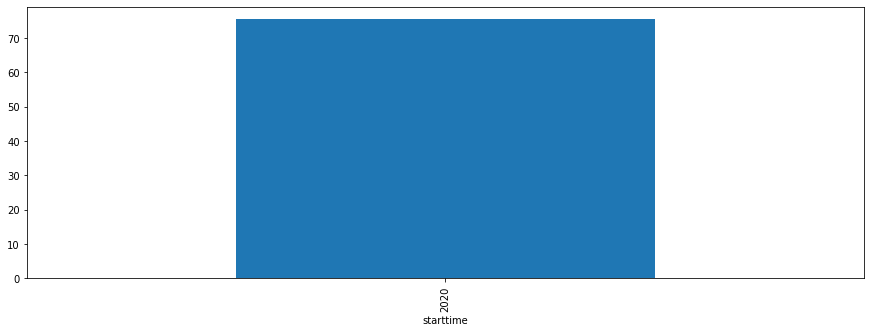

In [16]:
subscriber_to_total = 100*df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration']
subscriber_to_total.plot(kind='bar',figsize=(15, 5))

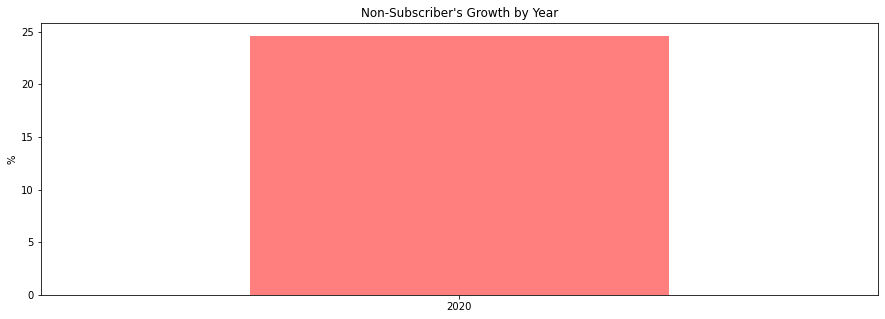

In [17]:
customer_to_total = 100*(1-df_Subscriber_grouped_year['tripduration']/df_grouped_year['tripduration'])
ax = customer_to_total.plot(kind='bar',color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("%");
ax.set_title("Non-Subscriber's Growth by Year");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during summer months?

In [ ]:
# summer (June, July, August)
df_resampled_year = df_merged['starttime'].resample('Y')
df_resampled_year


In [ ]:
df_resampled_year.count()

In [ ]:
df_resampled_by_hour = df_merged['starttime'].resample('H').count()

In [ ]:
df_resampled_by_hour

In [ ]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-06-01")]

In [ ]:
df_resampled_by_hour_summer_2018 = df_resampled_by_hour_summer_2018.loc[(df_resampled_by_hour_summer_2018.index < "2018-09-01")]

In [ ]:
df_summer_2018 = pd.DataFrame(df_resampled_by_hour_summer_2018.resample('H').sum())

In [ ]:
df_summer_2018.plot()

In [ ]:
ax = df_summer_2018.groupby(by=[ df_summer_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2018)");

In [ ]:
df_resampled_by_hour_summer_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-06-01")]
df_resampled_by_hour_summer_2019 = df_resampled_by_hour_summer_2019.loc[(df_resampled_by_hour_summer_2019.index < "2019-09-01")]
df_summer_2019 = pd.DataFrame(df_resampled_by_hour_summer_2019.resample('H').sum())
ax = df_summer_2019.groupby(by=[ df_summer_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2019)");

In [ ]:
df_resampled_by_hour_summer_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-06-01")]
df_resampled_by_hour_summer_2020 = df_resampled_by_hour_summer_2020.loc[(df_resampled_by_hour_summer_2020.index < "2020-09-01")]
df_summer_2020 = pd.DataFrame(df_resampled_by_hour_summer_2020.resample('H').sum())
ax = df_summer_2020.groupby(by=[ df_summer_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Summer 2020)");

<hr style="border-top: 3px solid gray;">

* What are the peak hours in which bikes are used during winter months?

In [ ]:
df_resampled_by_hour_winter_2018 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2018-01-01")]
df_resampled_by_hour_winter_2018 = df_resampled_by_hour_winter_2018.loc[(df_resampled_by_hour_winter_2018.index < "2018-03-01")]
df_winter_2018 = pd.DataFrame(df_resampled_by_hour_winter_2018.resample('H').sum())
ax = df_winter_2018.groupby(by=[ df_winter_2018.index.hour]).sum().plot(kind="bar", color="g", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2018)");

In [ ]:
df_resampled_by_hour_winter_2019 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2019-01-01")]
df_resampled_by_hour_winter_2019 = df_resampled_by_hour_winter_2019.loc[(df_resampled_by_hour_winter_2019.index < "2019-03-01")]
df_winter_2019 = pd.DataFrame(df_resampled_by_hour_winter_2019.resample('H').sum())
ax = df_winter_2019.groupby(by=[ df_winter_2019.index.hour]).sum().plot(kind="bar", color="b", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2019)");

In [ ]:
df_resampled_by_hour_winter_2020 = df_resampled_by_hour.loc[(df_resampled_by_hour.index >= "2020-01-01")]
df_resampled_by_hour_winter_2020 = df_resampled_by_hour_winter_2020.loc[(df_resampled_by_hour_winter_2020.index < "2020-03-01")]
df_winter_2020 = pd.DataFrame(df_resampled_by_hour_winter_2020.resample('H').sum())
ax = df_winter_2020.groupby(by=[ df_winter_2020.index.hour]).sum().plot(kind="bar", color="r", alpha=0.5,rot=0,figsize=(15, 5))
ax.set_xlabel("Hour");
ax.set_ylabel("Trips");
ax.set_title("Trips by Hour (Winter 2020)");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for starting a journey? (Based on data, why do you hypothesize these are the top locations?)

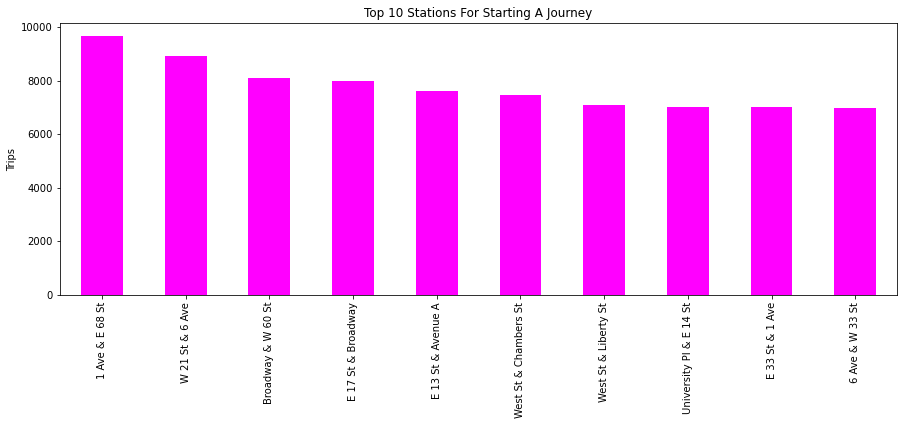

In [30]:
top10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").count().sort_values("tripduration",ascending=False).head(10)
ax = top10_start_stations['tripduration'].plot(kind="bar", color="fuchsia", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the top 10 stations in the city for ending a journey? (Based on data, why?)

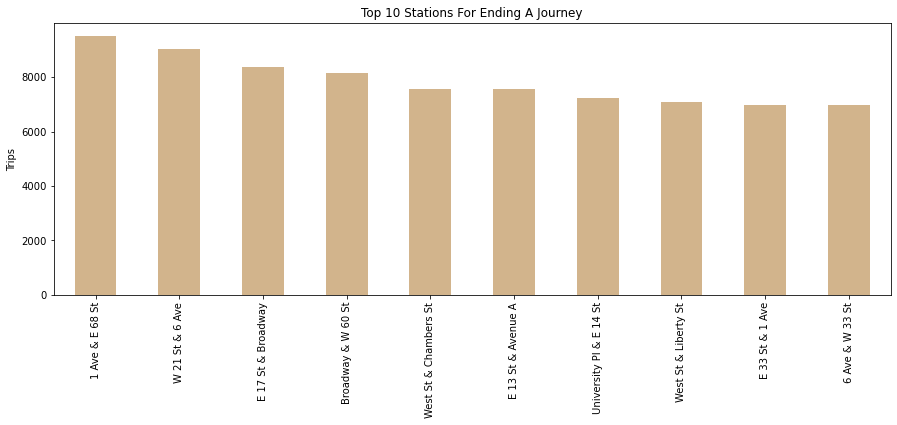

In [32]:
top10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").count().sort_values("tripduration",ascending=False).head(10)
ax = top10_ending_stations['tripduration'].plot(kind="bar", color="tan", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Top 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for starting a journey? (Based on data, why?)

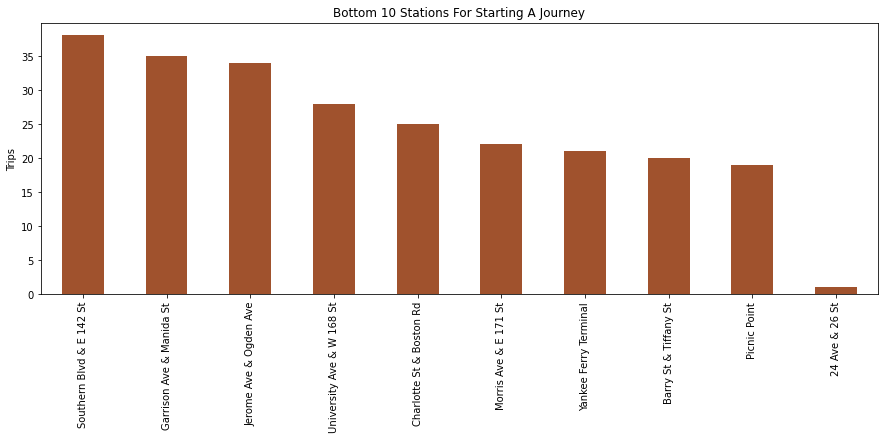

In [33]:
bottom10_start_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("start station name").count().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_start_stations['tripduration'].plot(kind="bar", color="sienna", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Starting A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what are the bottom 10 stations in the city for ending a journey (Based on data, why?)

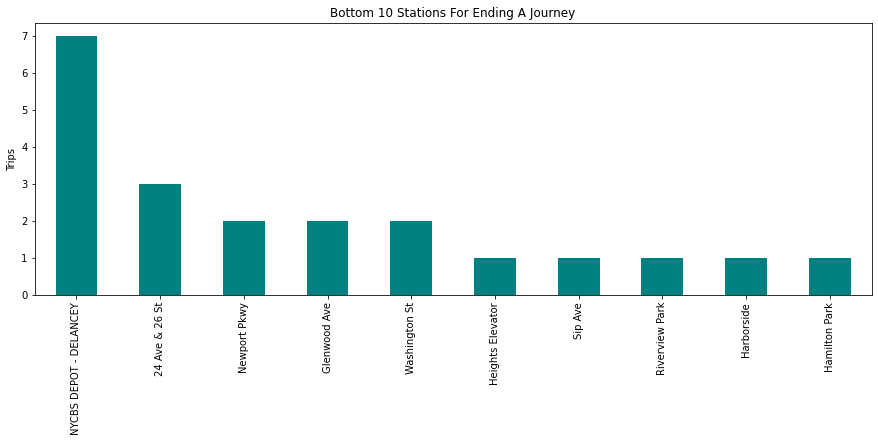

In [34]:
bottom10_ending_stations = df_merged.loc[(df_merged.index >= "2020-11-01")].groupby("end station name").count().sort_values("tripduration",ascending=True).head(10).sort_values("tripduration",ascending=False)
ax = bottom10_ending_stations['tripduration'].plot(kind="bar", color="teal", alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Bottom 10 Stations For Ending A Journey");

<hr style="border-top: 3px solid gray;">

* Today, what is the gender breakdown of active participants (Male v. Female)?

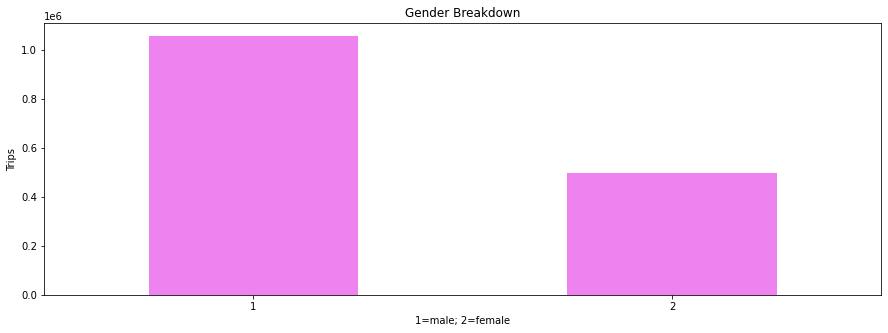

In [35]:
gender_breakdown = df_merged.loc[(df_merged.index >= "2020-11-01") & (df_merged.gender != 0)].groupby("gender")
ax = gender_breakdown['tripduration'].count().plot(kind="bar", rot=0,color="violet", alpha=1,figsize=(15, 5))
ax.set_xlabel("1=male; 2=female");
ax.set_ylabel("Trips");
ax.set_title("Gender Breakdown");

<hr style="border-top: 3px solid gray;">

* How effective has gender outreach been in increasing female ridership over the timespan?

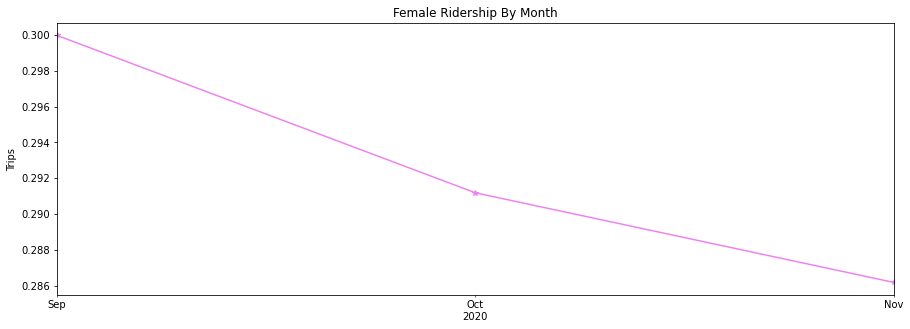

In [37]:
female_ridership_by_month = df_merged['tripduration'].loc[(df_merged.gender == 2)].resample("M").count() / df_merged['tripduration'].resample("M").count()
ax = female_ridership_by_month.plot(color="violet",marker='*', alpha=1,figsize=(15, 5))
ax.set_xlabel("");
ax.set_ylabel("Trips");
ax.set_title("Female Ridership By Month");

<hr style="border-top: 3px solid gray;">

* How does the average trip duration change by age?

In [52]:
df_merged['birth year'].value_counts()

1969    760078
1990    316478
1992    270839
1991    269277
1989    250281
         ...  
1884         4
1914         2
1898         1
1902         1
1916         1
Name: birth year, Length: 115, dtype: int64

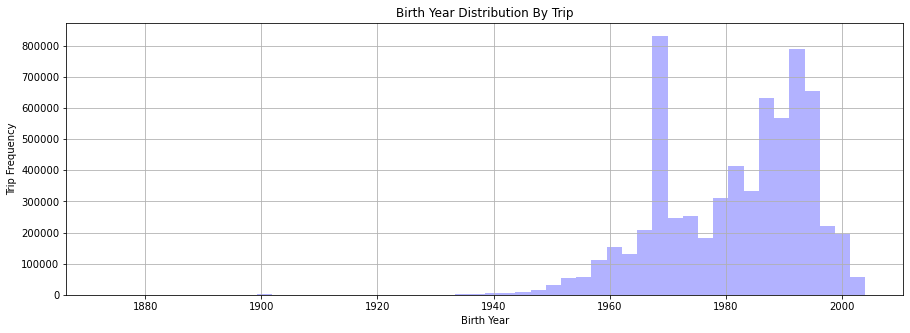

In [38]:
ax = df_merged['birth year'].hist(bins=50,color="b", alpha=.3,figsize=(15, 5))
ax.set_xlabel("Birth Year");
ax.set_ylabel("Trip Frequency");
ax.set_title("Birth Year Distribution By Trip");

In [39]:
df_grouped_age = df_merged.groupby("birth year")

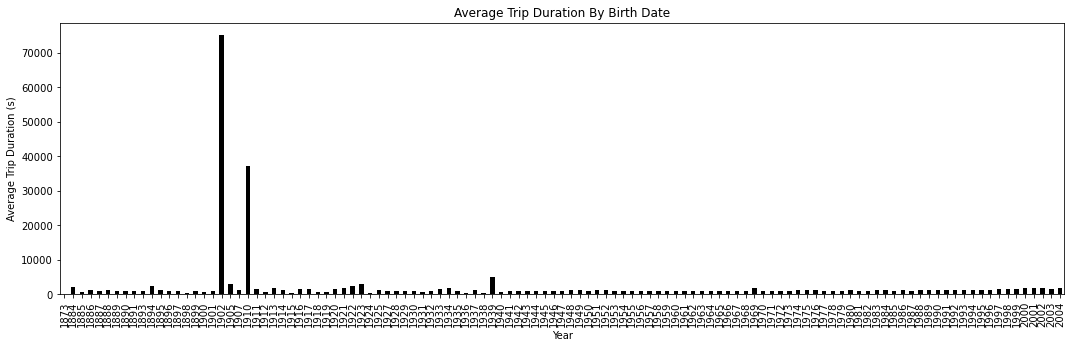

In [41]:
ax = df_grouped_age['tripduration'].mean().plot(kind="bar",color="k", alpha=1,figsize=(18, 5))
ax.set_xlabel("Year");
ax.set_ylabel("Average Trip Duration (s)");
ax.set_title("Average Trip Duration By Birth Date");

In [46]:
# Show the outlier for Birth Year 1902
df_merged.loc[(df_merged['birth year'] == 1902)]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2020-10-09 15:25:40.452,75005,2020-10-09 15:25:40.4520,2020-10-10 12:15:46.1230,3134,3 Ave & E 62 St,40.763126,-73.965269,3492,E 118 St & Park Ave,40.800539,-73.941995,38969,Customer,1902,1


In [50]:
# Show the outlier for Birth Year 1910
df_merged.loc[(df_merged['birth year'] == 1910) & (df_merged['tripduration'] > 5000)]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2020-10-09 22:51:08.365,403565,2020-10-09 22:51:08.3650,2020-10-14 14:57:13.7350,3740,W Broadway & W Houston St,40.726378,-74.000472,3435,Grand St & Elizabeth St,40.718822,-73.99596,29018,Subscriber,1910,1


In [42]:
df_grouped_age_usertype = df_merged.groupby(["birth year","usertype"]).count()

In [43]:
df_grouped_age_usertype

tripduration  starttime  stoptime  start station id  \
birth year usertype                                                          
1873       Subscriber            12         12        12                12   
1884       Subscriber             4          4         4                 4   
1885       Subscriber            79         79        79                79   
1886       Subscriber            27         27        27                27   
1887       Subscriber            17         17        17                17   
...                             ...        ...       ...               ...   
2002       Subscriber         19853      19853     19853             19853   
2003       Customer            5558       5558      5558              5558   
           Subscriber          8927       8927      8927              8927   
2004       Customer            2327       2327      2327              2327   
           Subscriber          2572       2572      2572              2572   

                       start station name  start station latitude  \
birth year usertype                                                 
1873       Subscriber                  12                      12   
1884       Subscriber                   4                       4   
1885       Subscriber                  79                      79   
1886       Subscriber                  27                      27   
1887       Subscriber                  17                      17   
...                                   ...                     ...   
2002       Subscriber               19853                   19853   
2003       Customer                  5558                    5558   
           Subscriber                8927                    8927   
2004       Customer                  2327                    2327   
           Subscriber                2572                    2572   

                       start station longitude  end station id  \
birth year usertype                                              
1873       Subscriber                       12              12   
1884       Subscriber                        4               4   
1885       Subscriber                       79              79   
1886       Subscriber                       27              27   
1887       Subscriber                       17              17   
...                                        ...             ...   
2002       Subscriber                    19853           19853   
2003       Customer                       5558            5558   
           Subscriber                     8927            8927   
2004       Customer                       2327            2327   
           Subscriber                     2572            2572   

                       end station name  end station latitude  \
birth year usertype                                             
1873       Subscriber                12                    12   
1884       Subscriber                 4                     4   
1885       Subscriber                79                    79   
1886       Subscriber                27                    27   
1887       Subscriber                17                    17   
...                                 ...                   ...   
2002       Subscriber             19853                 19853   
2003       Customer                5558                  5558   
           Subscriber              8927                  8927   
2004       Customer                2327                  2327   
           Subscriber              2572                  2572   

                       end station longitude  bikeid  gender  
birth year usertype                                           
1873       Subscriber                     12      12      12  
1884       Subscriber                      4       4       4  
1885       Subscriber                     79      79      79  
1886       Subscriber                     27      27      27  
1887       Subscriber      

In [58]:
# Verifind the outlier for birth year 1969
df_merged['usertype'][df_merged['birth year'] == 1969].value_counts()

Customer      643140
Subscriber    116938
Name: usertype, dtype: int64

In [62]:
df_merged[(df_merged['birth year'] == 1969) & (df_merged['usertype'] == 'Customer')]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2020-11-01 00:00:47.816,682,2020-11-01 00:00:47.8160,2020-11-01 00:12:09.9180,460,S 4 St & Wythe Ave,40.712859,-73.965903,3077,Stagg St & Union Ave,40.708771,-73.950953,19879,Customer,1969,0
2020-11-01 00:01:45.576,132,2020-11-01 00:01:45.5760,2020-11-01 00:03:58.0030,4048,St. Nicholas Ave & W 157 St,40.832314,-73.941020,3973,St Nicholas Ave & W 150 St,40.827212,-73.942722,36636,Customer,1969,0
2020-11-01 00:01:49.433,632,2020-11-01 00:01:49.4330,2020-11-01 00:12:21.5090,3812,University Pl & E 14 St,40.734814,-73.992085,293,Lafayette St & E 8 St,40.730207,-73.991026,45230,Customer,1969,0
2020-11-01 00:02:45.950,1626,2020-11-01 00:02:45.9500,2020-11-01 00:29:52.0700,4102,Grand Concourse & E 164 St,40.829608,-73.921461,4205,Crotona Park North & Prospect Ave,40.841092,-73.892317,44714,Customer,1969,0
2020-11-01 00:03:43.098,1258,2020-11-01 00:03:43.0980,2020-11-01 00:24:41.2440,3737,Stanton St & Norfolk St,40.720747,-73.986274,460,S 4 St & Wythe Ave,40.712859,-73.965903,35359,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30 23:58:57.294,3603,2020-09-30 23:58:57.2940,2020-10-01 00:59:00.3330,4043,W 78 St & Amsterdam Ave,40.782536,-73.979085,3164,Columbus Ave & W 72 St,40.777057,-73.978985,30241,Customer,1969,0
2020-09-30 23:59:00.874,426,2020-09-30 23:59:00.8740,2020-10-01 00:06:07.0460,3820,Willoughby Ave & Myrtle Ave,40.697570,-73.930980,3760,Willoughby Ave & Wyckoff Ave,40.705614,-73.921530,37051,Customer,1969,0
2020-09-30 23:59:04.048,338,2020-09-30 23:59:04.0480,2020-10-01 00:04:42.3960,3711,E 13 St & Avenue A,40.729667,-73.980680,497,E 17 St & Broadway,40.737050,-73.990093,37407,Customer,1969,0


In [ ]:
df_merged[['starttime','tripduration']][(df_merged['birth year'] == 1969) & (df_merged['usertype'] == 'Customer')].groupby('starttime').sum()

<hr style="border-top: 3px solid gray;">

* What is the average distance in miles that a bike is ridden?

In [ ]:
from geopy.distance import geodesic

origin = (df_merged['start station latitude'].iloc[0], df_merged['start station longitude'].iloc[0])
dist = (df_merged['end station latitude'].iloc[0], df_merged['end station longitude'].iloc[0])
print(f"Distance is {round(100*geodesic(origin, dist).miles)/100} miles")

In [ ]:
list_distances = []
for index in range(len(df_merged.index)):
    origin = (df_merged['start station latitude'].iloc[index], df_merged['start station longitude'].iloc[index])
    dist = (df_merged['end station latitude'].iloc[index], df_merged['end station longitude'].iloc[index])
#     print(f"Distance is {round(100*geodesic(origin, dist).miles)/100} miles")
    list_distances.append(round(100*geodesic(origin, dist).miles)/100)

In [ ]:
average_distance = sum(list_distances)/len(list_distances)

In [ ]:
average_distance

In [ ]:
pd.DataFrame(list_distances).hist()

<hr style="border-top: 3px solid gray;">

* Which bikes (by ID) are most likely due for repair or inspection in the timespan?

In [ ]:
df_groupby = df_merged.groupby("bikeid")

In [ ]:
ax = df_groupby['tripduration'].sum().sort_values(ascending=False).head(15).plot(kind="bar", color="y", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Top 10 Bikes By Total Trip Time");

In [ ]:
ax = df_groupby['tripduration'].sum().sort_values(ascending=True).head(15).sort_values(ascending=False).plot(kind="bar", color="g", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Bottom 10 Bikes By Total Trip Time");

<hr style="border-top: 3px solid gray;">

* How variable is the utilization by bike ID?

In [ ]:
ax = df_groupby['tripduration'].count().plot(color="k", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip");
ax.set_title("Total Trips by Bike");

In [ ]:
ax = df_groupby['tripduration'].sum().plot(color="r", alpha=1,figsize=(15, 5))
ax.set_xlabel("bikeid");
ax.set_ylabel("Trip Duration (s)");
ax.set_title("Total Trip Duration by Bike");

<hr style="border-top: 3px solid gray;">